In [6]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def f(x):
    return x**2 - 3 * x + 10

In [3]:
f(3.0)

10.0

In [5]:
# f'x = 2 * x - 3 f'x = lim delth -> 0 (f(x + delth) - f(x)) / delth
h = 0.001
(f(3.0 + h) - f(3.0)) / h
f(3.0 + h)

10.003001

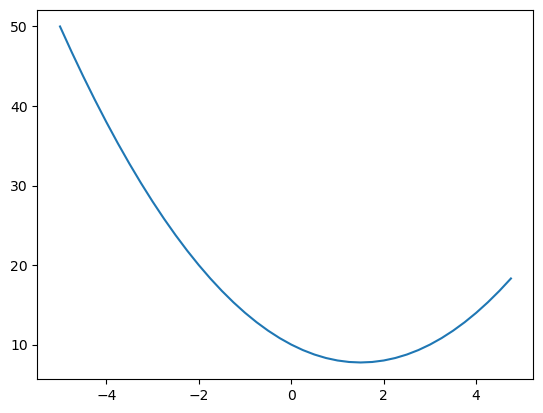

In [7]:
x = np.arange(-5, 5, 0.25)
y = f(x)
plt.plot(x, y)

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = ""):
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._backward = lambda: None
        self._op = _op
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        def backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
        out._backward = backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        def backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = backward
        return out
    
    def __repr__(self):
        return f"Value(data:{self.data})"
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1

        for v in reversed(topo):
            v._backward()

    

In [25]:
a = Value(3.0)
b = Value(4.0)
c = a * b
d = Value(10.0)
e = c + d
e.grad = 1
print(e._prev)

{Value(data:12.0), Value(data:10.0)}


In [26]:
e._backward()

In [27]:
print(c.grad, d.grad)
c._backward()
print(a.grad, b.grad)

1 1
4.0 3.0


In [28]:
lr = 0.01
a = Value(3.0 + lr * a.grad)
b = Value(4.0 + lr * b.grad)
c = a * b
d = Value(10.0)
e = c + d
e.grad = 1
print(e)

Value(data:22.2512)


In [17]:
def get_nodes_edges(root):
    nodes = set()
    edges = set()
    def get(node):
        if node not in nodes:
            nodes.add(node)
        
        for child in node._prev:
            edges.add((child, node))
            get(child)
    get(root)
    return nodes, edges

In [18]:
n, e = get_nodes_edges(e)
print(n)
print(e)

{Value(data:10.0), Value(data:4.0), Value(data:3.0), Value(data:12.0), Value(data:22.0)}
{(Value(data:12.0), Value(data:22.0)), (Value(data:4.0), Value(data:12.0)), (Value(data:10.0), Value(data:22.0)), (Value(data:3.0), Value(data:12.0))}
